Name: Dharini PV

Register No: 212222240024

In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd


auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)


worksheet = gc.open('dl_exp1').sheet1


rows = worksheet.get_all_values()


df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'INPUT':'float'})
df = df.astype({'OUTPUT':'float'})
df

,INPUT,OUTPUT
0,1.0,12.0
1,2.0,17.0
2,3.0,22.0
3,4.0,27.0
4,5.0,32.0
5,6.0,37.0
6,7.0,42.0
7,8.0,47.0
8,9.0,52.0
9,10.0,57.0


In [ ]:
x=df[['INPUT']].values
y=df[['OUTPUT']].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=33)

In [ ]:
scaler=MinMaxScaler()

In [ ]:
scaler.fit(x_train)

MinMaxScaler()

In [ ]:
x_train1=scaler.transform(x_train)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
AI=Sequential([
    Dense(units=5,activation='relu',input_shape=[1]),
    Dense(units=3,activation='relu'),
    Dense(units=4,activation='relu'),
    Dense(units=1)
])

In [ ]:
AI.compile(optimizer='rmsprop',loss='mse')

In [ ]:
AI.fit(x_train1,y_train,epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 441ms/step - loss: 985.9106
Epoch 2/2000
1/1 [==============================] - 0s 10ms/step - loss: 985.5603
Epoch 3/2000
1/1 [==============================] - 0s 8ms/step - loss: 985.3345
Epoch 4/2000
1/1 [==============================] - 0s 7ms/step - loss: 985.0873
Epoch 5/2000
1/1 [==============================] - 0s 7ms/step - loss: 984.8422
Epoch 6/2000
1/1 [==============================] - 0s 7ms/step - loss: 984.5432
Epoch 7/2000
1/1 [==============================] - 0s 10ms/step - loss: 984.0679
Epoch 8/2000
1/1 [==============================] - 0s 8ms/step - loss: 983.4363
Epoch 9/2000
1/1 [==============================] - 0s 7ms/step - loss: 982.9767
Epoch 10/2000
1/1 [==============================] - 0s 8ms/step - loss: 982.6115
Epoch 11/2000
1/1 [==============================] - 0s 9ms/step - loss: 982.3501
Epoch 12/2000
1/1 [==============================] - 0s 8ms/step - loss: 982.0934
Epoch 13/2000
1/1 [==

In [ ]:
loss_df = pd.DataFrame(AI.history.history)

<Axes: >

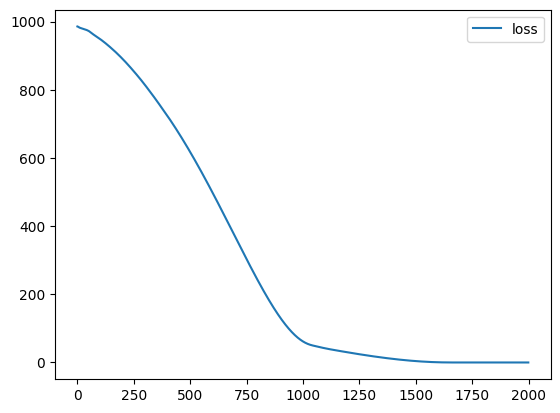

In [ ]:
loss_df.plot()

In [ ]:
x_test1 = scaler.transform(x_test)

In [ ]:
AI.evaluate(x_test1,y_test)

1/1 [==============================] - 0s 138ms/step - loss: 0.0439


0.04391973093152046

In [ ]:
x_n1 = [[5]]

In [ ]:
x_n1_1 = scaler.transform(x_n1)

In [ ]:
AI.predict(x_n1_1)

1/1 [==============================] - 0s 83ms/step


array([[32.040558]], dtype=float32)